# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we will complete the analysis of what sorts of people were likely to survive, using dataset available on Kaggle:
https://www.kaggle.com/c/titanic/data

## Titanic Dataset

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

### Data Dictionary

``survival:`` Survival (0 = No, 1 = Yes)  
``pclas:``	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
``sex:`` Sex	
``age:``	Age in years	
``sibsp: ``	# of siblings / spouses aboard the Titanic	
``parch: ``	# of parents / children aboard the Titanic	
``ticket: `` Ticket number	
``fare: `` Passenger fare	
``cabin: `` Cabin number	
``embarked: `` Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [85]:
# Importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
# Reading train and test datasets

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

print('Train shape: ', train.shape, '| Test shape', test.shape)
train.head()

Train shape:  (891, 12) | Test shape (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Clean 
In this section, we should be able to determinate some columns that aren't important for us in this context and remove some trashes into the dataset.

We adopt a premise that the ``PassengerId``, ``Ticket``, ``Cabin`` and ``Fare``  columns are not relevant to our context. So, in Data Clean section we’ll take a 3 step approach to data clean:

- Identify and remove any duplicate entries
- Remove unnecessary columns
- Fix missing and data format issues

### Remove Duplicates

In [87]:
train_duplicates = train.duplicated()
print('Number of duplicate entries in Train Dataset is/are {}'.format(train_duplicates.sum()))

Number of duplicate entries in Train Dataset is/are 0


### Remove Unnecessary Columns

``PassengerId``, ``Ticket``, ``Cabin`` and ``Fare``  columns

In [88]:
train_cleaned = train.drop(['PassengerId','Ticket','Cabin','Fare'], axis=1)
test_cleaned = test.drop(['PassengerId','Ticket','Cabin','Fare'], axis=1)
train_cleaned.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


### Fix missing data and wrong formats

In this section, we should be able to analyze the attributes, looking for if are null data, wrong formats or something else.

Unfortunatelly, there are missing values in Age attribute.

In [89]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


In [90]:
survived_without_age = train_cleaned[(train_cleaned["Survived"] == 1) & (train_cleaned['Age'].isnull())].shape[0]
died_without_age = train_cleaned[(train_cleaned["Survived"] == 0) & (train_cleaned['Age'].isnull())].shape[0]

print('Survived without age:', survived_without_age, ', Died without age:', died_without_age)

Survived without age: 52 , Died without age: 125


These missing ``Age`` data is a big problem, such as it represents about 20% our train dataset.

In [91]:
# Getting mean about Class 1: survived and died women and men
class_one_female = train_cleaned[(train_cleaned['Pclass'] == 1) & (train_cleaned['Sex'] == 'female')]
fs_mean_1 = class_one_female[class_one_female['Survived'] == 1]['Age'].mean()
fd_mean_1 = class_one_female[class_one_female['Survived'] == 0]['Age'].mean()

class_one_male = train_cleaned[(train_cleaned['Pclass'] == 1) & (train_cleaned['Sex'] == 'male')]
ms_mean_1 = class_one_male[class_one_male['Survived'] == 1]['Age'].mean()
md_mean_1 = class_one_male[class_one_male['Survived'] == 0]['Age'].mean()

# Getting mean about Class 2: survived and died women and men
class_two_female = train_cleaned[(train_cleaned['Pclass'] == 2) & (train_cleaned['Sex'] == 'female')]
fs_mean_2 = class_two_female[class_two_female['Survived'] == 1]['Age'].mean()
fd_mean_2 = class_two_female[class_two_female['Survived'] == 0]['Age'].mean()

class_two_male = train_cleaned[(train_cleaned['Pclass'] == 2) & (train_cleaned['Sex'] == 'male')]
ms_mean_2 = class_two_male[class_two_male['Survived'] == 1]['Age'].mean()
md_mean_2 = class_two_male[class_two_male['Survived'] == 0]['Age'].mean()

# Getting mean about Class 3: survived and died women and men
class_three_female = train_cleaned[(train_cleaned['Pclass'] == 3) & (train_cleaned['Sex'] == 'female')]
fs_mean_3 = class_three_female[class_three_female['Survived'] == 1]['Age'].mean()
fd_mean_3 = class_three_female[class_three_female['Survived'] == 0]['Age'].mean()

class_three_male = train_cleaned[(train_cleaned['Pclass'] == 3) & (train_cleaned['Sex'] == 'male')]
ms_mean_3 = class_three_male[class_three_male['Survived'] == 1]['Age'].mean()
md_mean_3 = class_three_male[class_three_male['Survived'] == 0]['Age'].mean()

In [92]:
# Updating Ages in Class 1
train_cleaned.loc[(train_cleaned['Survived'] == 1) & (train_cleaned['Pclass'] == 1) 
                  & (train_cleaned['Sex'] == 'female') & (train_cleaned['Age'].isnull()), 'Age'] = fs_mean_1

train_cleaned.loc[(train_cleaned['Survived'] == 0) & (train_cleaned['Pclass'] == 1) 
                  & (train_cleaned['Sex'] == 'female') & (train_cleaned['Age'].isnull()), 'Age'] = fd_mean_1

train_cleaned.loc[(train_cleaned['Survived'] == 1) & (train_cleaned['Pclass'] == 1) 
                  & (train_cleaned['Sex'] == 'male') & (train_cleaned['Age'].isnull()), 'Age'] = ms_mean_1

train_cleaned.loc[(train_cleaned['Survived'] == 0) & (train_cleaned['Pclass'] == 1) 
                  & (train_cleaned['Sex'] == 'male') & (train_cleaned['Age'].isnull()), 'Age'] = md_mean_1

# Updating Ages in Class 2
train_cleaned.loc[(train_cleaned['Survived'] == 1) & (train_cleaned['Pclass'] == 2) 
                  & (train_cleaned['Sex'] == 'female') & (train_cleaned['Age'].isnull()), 'Age'] = fs_mean_2

train_cleaned.loc[(train_cleaned['Survived'] == 0) & (train_cleaned['Pclass'] == 2) 
                  & (train_cleaned['Sex'] == 'female') & (train_cleaned['Age'].isnull()), 'Age'] = fd_mean_2

train_cleaned.loc[(train_cleaned['Survived'] == 1) & (train_cleaned['Pclass'] == 2) 
                  & (train_cleaned['Sex'] == 'male') & (train_cleaned['Age'].isnull()), 'Age'] = ms_mean_2

train_cleaned.loc[(train_cleaned['Survived'] == 0) & (train_cleaned['Pclass'] == 2) 
                  & (train_cleaned['Sex'] == 'male') & (train_cleaned['Age'].isnull()), 'Age'] = md_mean_2


# Updating Ages in Class 3
train_cleaned.loc[(train_cleaned['Survived'] == 1) & (train_cleaned['Pclass'] == 3) 
                  & (train_cleaned['Sex'] == 'female') & (train_cleaned['Age'].isnull()), 'Age'] = fs_mean_3

train_cleaned.loc[(train_cleaned['Survived'] == 0) & (train_cleaned['Pclass'] == 3) 
                  & (train_cleaned['Sex'] == 'female') & (train_cleaned['Age'].isnull()), 'Age'] = fd_mean_3

train_cleaned.loc[(train_cleaned['Survived'] == 1) & (train_cleaned['Pclass'] == 3) 
                  & (train_cleaned['Sex'] == 'male') & (train_cleaned['Age'].isnull()), 'Age'] = ms_mean_3

train_cleaned.loc[(train_cleaned['Survived'] == 0) & (train_cleaned['Pclass'] == 3) 
                  & (train_cleaned['Sex'] == 'male') & (train_cleaned['Age'].isnull()), 'Age'] = md_mean_3

Checking if there is no missing Ages

In [93]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


## Exploring and Visualization Dataset 
As we all know, during the tragedy there was a prioritization of lifeboats for children and women. Let's see if this behavior reflects on the dataset, mainly between men and women.

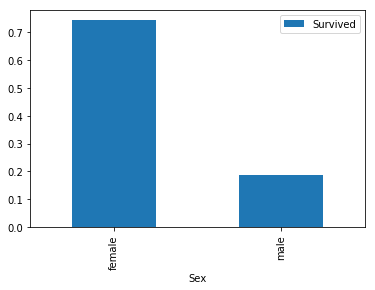

In [94]:
sex_graph = train.pivot_table(index="Sex", values="Survived") 
sex_graph.plot.bar()
plt.show()

In fact, as we can see, there were more women survived than men!

Another point deserves our attention is how we can fix the problem with missing age of the people on board.

In [96]:
train_cleaned.Age.describe()

count    891.000000
mean      29.339313
std       13.370271
min        0.420000
25%       21.000000
50%       27.255814
75%       36.000000
max       80.000000
Name: Age, dtype: float64

As we can see, we had 29 years old as mean, a newborn with 4 months and a old person representig min and max ages respectively. I believe Age is an important attribute and it can't be null. So, let's see if there are null values..

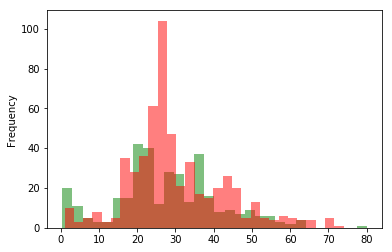

In [97]:
survived = train_cleaned[train_cleaned["Survived"] == 1]
died = train_cleaned[train_cleaned["Survived"] == 0]

survived["Age"].plot.hist(bins=30, color='green', alpha=0.5)
died["Age"].plot.hist(bins=30, color='red', alpha=0.5)

Some questions could be made about tragedy:

- Were social-economic standing a factor in survival rate?
- Did age, regardless of sex and class, determine your chances of survival?

In [99]:
# Class 1
print('Class 1:')
f_surv_one = class_one_female[class_one_female['Survived'] == 1].shape[0]
f_died_one = class_one_female[class_one_female['Survived'] == 0].shape[0]

print('Women Survived: ', f_surv_one, 'Women Died: ',f_died_one)

m_surv_one = class_one_male[class_one_male['Survived'] == 1].shape[0]
m_died_one = class_one_male[class_one_male['Survived'] == 0].shape[0]

print('Men Survived: ', m_surv_one, 'Men Died: ', m_died_one)

# Class 2
print('Class 2: ')
f_surv_two = class_two_female[class_two_female['Survived'] == 1].shape[0]
f_died_two = class_two_female[class_two_female['Survived'] == 0].shape[0]

print('Women Survived: ', f_surv_two, 'Women Died: ', f_died_two)

m_surv_two = class_two_male[class_two_male['Survived'] == 1].shape[0]
m_died_two = class_two_male[class_two_male['Survived'] == 0].shape[0]

print('Men Survived: ', m_surv_two, 'Men Died: ', m_died_two)

# Class 3
print('Class 3: ')
f_surv_three = class_three_female[class_three_female['Survived'] == 1].shape[0]
f_died_three = class_three_female[class_three_female['Survived'] == 0].shape[0]

print('Women Survived: ', f_surv_three, 'Women Died: ', f_died_three)

m_surv_three = class_three_male[class_three_male['Survived'] == 1].shape[0]
m_died_three = class_three_male[class_three_male['Survived'] == 0].shape[0]

print('Men Survived: ', m_surv_three, 'Men Died: ', m_died_three)

Class 1:
Women Survived:  91 Women Died:  3
Men Survived:  45 Men Died:  77
Class 2: 
Women Survived:  70 Women Died:  6
Men Survived:  17 Men Died:  91
Class 3: 
Women Survived:  72 Women Died:  72
Men Survived:  47 Men Died:  300


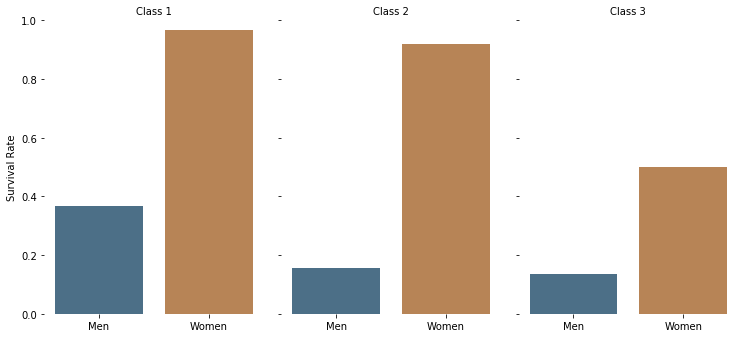

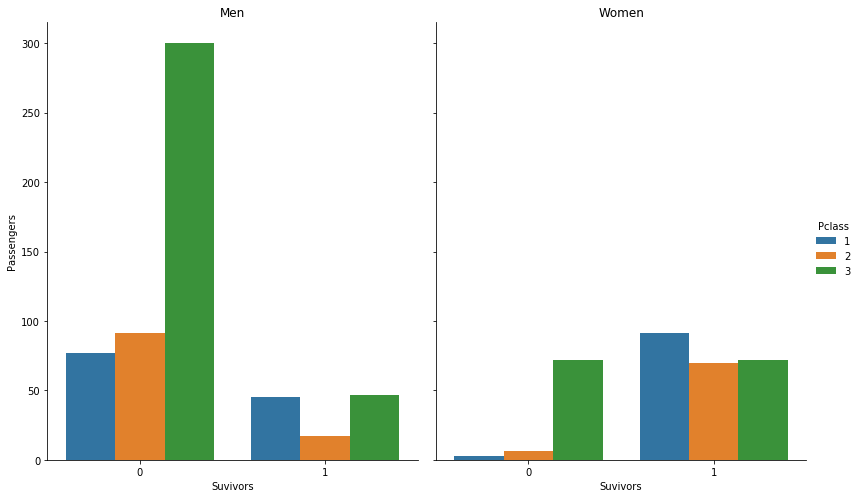

In [100]:
g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=train_cleaned,
                saturation=0.4, kind="bar", ci=None, height=5, aspect=.7)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
  .set_xticklabels(["Men", "Women"])
  .set_titles("Class {col_name}")
  .set(ylim=(0, 1))
  .despine(left=True, bottom=True))

# Graph - Actual count of passengers by survival, group and sex
g = sns.catplot('Survived', col='Sex', hue='Pclass', data=train_cleaned, kind='count', height=7, aspect=.8)

# Fix up the labels
g.set_axis_labels('Suvivors', 'Passengers')

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Based at the graphs, passengers in Class 3 had a similar survival rate as those from Class 1. However, looking at the percentages of the overall passengers per class and the total numbers across each class, it can be assumed that a passenger from Class 1 is more likely to survive than a passenger in Class 3.

## Modeling
In this section, we should be able to determinate the best model to predict survived people in this disaster.